In [1]:
import os
import numpy as np
 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib as plt
from tensorflow import keras


In [3]:
file_str="RWs_H_g_2p2_tadv_1min"
LSTM_save_name="best_LSTM_"+file_str +".h5"
data=np.load('Data/Prepared/'+file_str+".npz")

for vars in data:
    print(vars)

wave_data_test=data["wave_data_test"]
label_test=data["label_test"]

wave_data_train
wave_data_test
label_train
label_test
z_disp_rw
z_disp_norw


In [4]:
model_LSTM = keras.models.load_model(file_str+'/'+LSTM_save_name)

In [5]:
labels_test_predicted=model_LSTM.predict(wave_data_test)


cm = confusion_matrix( label_test,np.argmax(labels_test_predicted, axis=1))


233/233 [==============================] - 38s 156ms/step


 Test accuracy 0.759157386287401


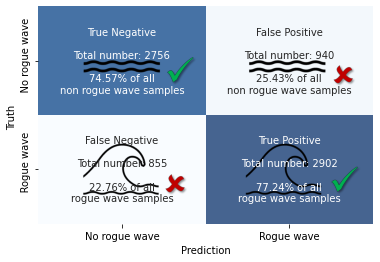

In [6]:
#plt.rc('text', usetex=True)

print(" Test accuracy" , str((cm[1,1]+cm[0,0])/np.sum(cm)) )
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['Total number: '+"{0:0.0f}".format(value) for value in
                cm.flatten()]
cond_porb=np.array([[cm[0,0]/(cm[0,0]+cm[0,1]),cm[0,1]/(cm[0,0]+cm[0,1])],[cm[1,0]/(cm[1,0]+cm[1,1]),cm[1,1]/(cm[1,0]+cm[1,1])]])

cond_porb = ["{0:.2%}".format(value) +' of all' for value in
                     cond_porb.flatten()]

labels=['non rogue wave samples', 'non rogue wave samples', 'rogue wave samples', 'rogue wave samples']


#["{0:.2%}".format(value) for value in
 #                    cm.flatten()/np.sum(cm)]

field_names = [f"{v1}\n\n{v2}\n\n{v3}\n{v4}" for v1, v2, v3, v4 in
          zip(group_names,group_counts,cond_porb,labels)]

field_names = np.asarray(field_names).reshape(2,2)
 

labels=['No Rogue Wave','Rogue Wave']
map_img = plt.image.imread('CM_map.png') 
ax = sns.heatmap(cm, annot=field_names, fmt='', cmap='Blues',cbar=False,alpha = 0.75)
ax.imshow(map_img,
          aspect = ax.get_aspect(),
          extent = ax.get_xlim() + ax.get_ylim(),
          zorder = 1)
#ax.set_title('Confusion Matrix');
ax.set_xlabel('Prediction')
ax.set_ylabel('Truth ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No rogue wave','Rogue wave'])
ax.yaxis.set_ticklabels(['    No rogue wave','     Rogue wave'])

filename=os.getcwd()+'/CM_' +file_str+'.jpg'
plt.pyplot.savefig(filename,dpi=699)#, format='pdf',bbox_inches='tight')

## Display the visualization of the Confusion Matrix.
plt.pyplot.show()

## Buoy 067 Predictions

In [24]:
wave_data_buoy_067=data["wave_data_buoy_067"]
labels_067=data["labels_067"]
wave_data_buoy_067=wave_data_buoy_067.reshape((wave_data_buoy_067.shape[0], wave_data_buoy_067.shape[1], 1))

In [25]:
print(wave_data_buoy_067.shape)
print(wave_data_test.shape)

(662, 1536, 1)
(7321, 1536, 1)


In [26]:
labels_067_predicted=model_LSTM.predict(wave_data_buoy_067)


cm = confusion_matrix( labels_067,np.argmax(labels_067_predicted, axis=1))

21/21 [==============================] - 2s 86ms/step


 Test accuracy 0.7583081570996979


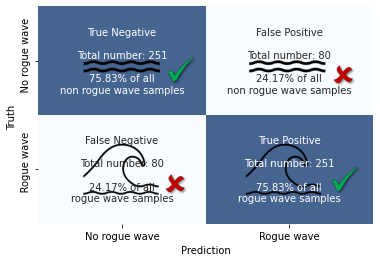

In [27]:
print(" Test accuracy" , str((cm[1,1]+cm[0,0])/np.sum(cm)) )
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['Total number: '+"{0:0.0f}".format(value) for value in
                cm.flatten()]
cond_porb=np.array([[cm[0,0]/(cm[0,0]+cm[0,1]),cm[0,1]/(cm[0,0]+cm[0,1])],[cm[1,0]/(cm[1,0]+cm[1,1]),cm[1,1]/(cm[1,0]+cm[1,1])]])

cond_porb = ["{0:.2%}".format(value) +' of all' for value in
                     cond_porb.flatten()]

labels=['non rogue wave samples', 'non rogue wave samples', 'rogue wave samples', 'rogue wave samples']


#["{0:.2%}".format(value) for value in
 #                    cm.flatten()/np.sum(cm)]

field_names = [f"{v1}\n\n{v2}\n\n{v3}\n{v4}" for v1, v2, v3, v4 in
          zip(group_names,group_counts,cond_porb,labels)]

field_names = np.asarray(field_names).reshape(2,2)
 

labels=['No Rogue Wave','Rogue Wave']
map_img = plt.image.imread('CM_map.png') 
ax = sns.heatmap(cm, annot=field_names, fmt='', cmap='Blues',cbar=False,alpha = 0.75)
ax.imshow(map_img,
          aspect = ax.get_aspect(),
          extent = ax.get_xlim() + ax.get_ylim(),
          zorder = 1)
#ax.set_title('Confusion Matrix');
ax.set_xlabel('Prediction')
ax.set_ylabel('Truth ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No rogue wave','Rogue wave'])
ax.yaxis.set_ticklabels(['    No rogue wave','     Rogue wave'])

filename=os.getcwd()+'/CM_extrapolate' +file_str+'.jpg'
plt.pyplot.savefig(filename,dpi=699)#, format='pdf',bbox_inches='tight')

## Display the visualization of the Confusion Matrix.
plt.pyplot.show()

## Real Ocean Predictions